>

# Project: Investigate European Soccer Database¶


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I choose to investigate European Soccer Database this data contain seven table [Country , League , Player , Player_attributes , Team , Team_attributes , Match].
the European Soccer Data consist of usfull information and statistics.the source of the dataset can be found on [European soccer Kaggle](https://www.kaggle.com/hugomathien/soccer)

> after I investigate the data I came up with these questions

1. Which team had the most victories at away in 2011/2012 season?

2. Which players had the most penalties?

3. who the best player in free kick accuracy?

4. what player attributes lead to be the best each year ?

5. who won the league in 2012/2013 in each country?

6. What team attributes lead to the most victories?



In [1]:
#import the modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sqla
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties
In this section I load the database and recive each table seperately,instead of using SQl I used pandas dataframe to investigate the dataset 

In [2]:

# connect to the SQLite database with SQLAlchemy and read data
soccer = sqla.create_engine('sqlite:///database.sqlite')

# recieve all tables
df_country = pd.read_sql('select * from Country', soccer)
df_league = pd.read_sql('select * from League', soccer)
df_player = pd.read_sql('select * from Player', soccer)
df_player_attr = pd.read_sql('select * from Player_Attributes', soccer)
df_team = pd.read_sql('select * from Team', soccer)
df_team_attr = pd.read_sql('select * from Team_Attributes', soccer)
df_match = pd.read_sql('select * from Match', soccer)

investigate each table

In [3]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
df_country.shape


(11, 2)

df_country has 11 unique values of country name and id

In [5]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [6]:
df_league.shape

(11, 3)

same before league table has 11 unique values of leagues name and id 

showing the first 5 raws in player table

In [7]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
df_player.shape

(11060, 7)

In [9]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


from this we need to adjust some columns datatype 
- converting birthday coulmn into date time 


In [10]:
df_player.duplicated().sum()

0

In [11]:
len(df_player.player_name.unique())

10848

there is 10848 unique name and the other name are dublicated because its common like Adriano,alex and others

In [12]:
df_player.player_name.duplicated().sum()

212

In [13]:
df_player[df_player.player_name.duplicated()]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
85,86,41749,Adailton,4769,1977-01-24 00:00:00,175.26,161
99,100,420209,Adam Drury,205162,1993-09-09 00:00:00,177.80,152
138,139,533212,Adama Traore,225151,1995-06-28 00:00:00,177.80,159
191,192,30690,Adriano,106019,1982-02-17 00:00:00,187.96,194
192,193,33992,Adriano,164082,1984-10-26 00:00:00,172.72,161
...,...,...,...,...,...,...,...
10739,10755,121957,Wellington,184845,1988-02-11 00:00:00,187.96,198
10756,10772,25617,Wesley,163092,1980-11-10 00:00:00,180.34,159
11018,11034,185867,Ze Eduardo,181132,1987-10-29 00:00:00,177.80,185
11021,11037,570159,Ze Manuel,223339,1990-10-23 00:00:00,177.80,157


In [14]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In player attribute dataframe there is player id i need to know player name so i will apply merge on player and player attr table to find statistics about players performance over the years

In [15]:
df_player_attr.shape

(183978, 42)

In [16]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [17]:
df_player_attr.isnull().sum()


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [18]:
df_player_attr.duplicated().sum()

0

- from the last code cell there so much null values must be removed
- converting date columns to date time 

In [19]:
df_team.shape

(299, 5)

showing the first five raws of the table

In [20]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [21]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


- 299 unique team to investigate
- there is null values must be solved

In [22]:
df_team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

In [23]:
df_team.duplicated().sum()

0

In [24]:
df_team.team_long_name.duplicated().sum()

3

there is 3 duplicate team name

In [25]:
df_team_attr.shape

(1458, 25)

df_team_attr has many raws showing the first five 

In [26]:
df_team_attr.iloc[:,0:20].head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium


there is team id but not the name i can apply merging on two table of df_team_attr and df_team to know each team statistics 

In [27]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

- buildUpPlayDribbling hasto many null the column will br removed
- converting date column to date time

In [28]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


to get info from the data the number of columns is big to show so we going to show each ten column and check the null value 

In [29]:
df_match.shape


(25979, 115)

In [30]:
df_match.iloc[:,95:115].isnull().sum()

LBD     3423
LBA     3423
PSH    14811
PSD    14811
PSA    14811
WHH     3408
WHD     3408
WHA     3408
SJH     8882
SJD     8882
SJA     8882
VCH     3411
VCD     3411
VCA     3411
GBH    11817
GBD    11817
GBA    11817
BSH    11818
BSD    11818
BSA    11818
dtype: int64

the most of the columns has to many null values we only need the first 11 columns to answer our question 



### Data Cleaning 

#### clean match table

- we will take the first 11 columns 

In [31]:
# drop any column that has null values
df_match.dropna(axis='columns', inplace=True)

In [32]:
# look at first raws of match table
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [33]:
# convert date column
df_match["date"]=pd.to_datetime(df_match["date"])

In [34]:
df_match.shape

(25979, 11)

country name we need to merge the country table with match table

In [35]:
# merge the country table with match table 
df_match =  df_match.merge(df_country, how='inner', left_on='country_id', right_on='id')
#drop the id column
df_match.drop(columns=['country_id'], inplace=True)


In [36]:
# look at the new table
df_match.head()

,id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,1,Belgium
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,1,Belgium
2,3,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,1,Belgium
3,4,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,1,Belgium
4,5,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,1,Belgium


In [37]:
# drop unwanted  columns
df_match.drop(columns=['id_y','id_x','id_y' ], inplace=True)

In [38]:
# renaming name  column 
df_match.rename(columns={'name': 'country_name'}, inplace=True)

replacing the league id with league name. we will merge match table with league table

In [39]:
# merge the league table with match table
df_match = df_match.merge(df_league, how='inner', left_on='league_id', right_on='id')

In [40]:
# renaming (name) column 
df_match.rename(columns={'name': 'league_name'}, inplace=True)

In [41]:
# drop unwanted columns
df_match.drop(columns=['league_id', 'id','country_id'], inplace=True)

In [42]:
# look at the new table 
df_match.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


as the same we will merge the team match table with team to replace eachhome_team_api_id and away_team_api_id with name of the team 

In [43]:
# at the first we merge for home_team_api_id
df_match = df_match.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

In [44]:
#look at the new table 
df_match.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,2008/2009,12,2008-11-15,492583,9987,9999,1,1,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
2,2008/2009,14,2008-11-29,492651,9987,9984,3,2,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
3,2008/2009,16,2008-12-13,492713,9987,9986,1,0,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
4,2008/2009,19,2009-01-24,492805,9987,9998,2,0,Belgium,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN


In [45]:
#drop the unwanted columns 
df_match.drop(columns=['home_team_api_id', 'team_api_id','team_fifa_api_id','id','team_short_name'], axis=1, inplace=True)

In [46]:
# rename the team_long_name to home_team
df_match.rename(columns={'team_long_name': 'home_team'}, inplace=True)

In [47]:
# look at the new table
df_match.head()

,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team
0,2008/2009,1,2008-08-17,492473,9993,1,1,Belgium,Belgium Jupiler League,KRC Genk
1,2008/2009,12,2008-11-15,492583,9999,1,1,Belgium,Belgium Jupiler League,KRC Genk
2,2008/2009,14,2008-11-29,492651,9984,3,2,Belgium,Belgium Jupiler League,KRC Genk
3,2008/2009,16,2008-12-13,492713,9986,1,0,Belgium,Belgium Jupiler League,KRC Genk
4,2008/2009,19,2009-01-24,492805,9998,2,0,Belgium,Belgium Jupiler League,KRC Genk


applying the same method to away_team_api_id to replace the by the name of the team

In [48]:
# merge the match and team by away_team_api_id column
df_match = df_match.merge(df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')

In [49]:
#drop the unwanted columns 
df_match.drop(columns=['away_team_api_id', 'team_api_id','team_fifa_api_id','id','team_short_name'], axis=1, inplace=True)

In [50]:
# rename the team_long_name to away_team
df_match.rename(columns={'team_long_name': 'away_team'}, inplace=True)

In [51]:
# look at the new table
df_match.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team,away_team
0,2008/2009,1,2008-08-17,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2009/2010,5,2009-08-30,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
2,2010/2011,1,2010-08-01,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
3,2011/2012,1,2011-07-30,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC
4,2012/2013,11,2012-10-20,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC


we need to indicate who is the winner so we will add new column winner that return the winner name or write tie

In [52]:
# showing who has more goals to indicate winning by true and false 
winner=df_match['home_team_goal']>df_match['away_team_goal']
# in case of equality write tie
tie=df_match['home_team_goal']==df_match['away_team_goal']
winner.head()

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [53]:
# writing the name of the winner 
winner[winner==True]=df_match["home_team"][winner==True]
winner[winner==False]=df_match["away_team"][winner==False]
# writing tie in the column
winner[tie==True]="tie"
winner.head()

0         tie
1         tie
2    KRC Genk
3    KRC Genk
4    KRC Genk
dtype: object

In [54]:
# adding the new column to the table
df_match["winner"]=winner
# looking at the new table 
df_match.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team,away_team,winner
0,2008/2009,1,2008-08-17,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
1,2009/2010,5,2009-08-30,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
2,2010/2011,1,2010-08-01,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
3,2011/2012,1,2011-07-30,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
4,2012/2013,11,2012-10-20,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk


In [55]:
# saving the cleaned table
df_match.to_csv('match_clean.csv', index=False)

##### clean player table and player attribute

- turn date of player to date time 

In [56]:
# this function turn datecolumn into date time then add year column to the given dataframe
def year_col(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
        
    


In [57]:
# convert the date column into date time then add year column
year_col(df_player_attr)

- to know player name not by the number we will merge the player and player attribute tables

In [58]:
# merge the player attrribute and the player table 
df_player_attr = df_player_attr.merge(df_player, left_on='player_api_id', right_on='player_api_id')

In [59]:
# looking at the new table
df_player_attr.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,year,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,2016,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,2015,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,2015,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,2015,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,2007,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


- now we drop the api ids like player_fifa_api_id_x 

In [60]:
df_player_attr.drop(columns=['player_fifa_api_id_x', 'player_fifa_api_id_y','id_y' ], inplace=True)

- convert birthday column to date time

In [61]:
df_player_attr['birthday'] = pd.to_datetime(df_player_attr['birthday'])

In [62]:
# rename the id_x col to id
df_player_attr.rename(columns={'id_x': 'id'}, inplace=True)

In [63]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_api_id        183978 non-null  int64         
 2   date                 183978 non-null  datetime64[ns]
 3   overall_rating       183142 non-null  float64       
 4   potential            183142 non-null  float64       
 5   preferred_foot       183142 non-null  object        
 6   attacking_work_rate  180748 non-null  object        
 7   defensive_work_rate  183142 non-null  object        
 8   crossing             183142 non-null  float64       
 9   finishing            183142 non-null  float64       
 10  heading_accuracy     183142 non-null  float64       
 11  short_passing        183142 non-null  float64       
 12  volleys              181265 non-null  float64       
 13  dribbling     

- now we can save the new table 

In [64]:
# saving the cleaned player table 
df_player_attr.to_csv('player_attr_clean.csv', index=False)

##### clean team and team attribute

In [65]:
df_team.team_long_name.duplicated().sum()

3

In [66]:
df_team[df_team.team_long_name.duplicated()]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
183,31445,8020,111429.0,Polonia Bytom,GOR
199,32409,8024,301.0,Widzew Łódź,WID


- removing the duplicate team name by index

In [67]:
# remove the duplicate team name
df_team.drop(index=[24, 183, 199], inplace=True)

- now lets merge the team and team attribute to name of the team on each raw 

In [68]:
# merge team attribute and team table
df_team_attr = df_team_attr.merge(df_team, left_on='team_api_id', right_on='team_api_id')

- drop the unwanted columns 

In [69]:
df_team_attr.drop(columns=['team_fifa_api_id_x', 'team_fifa_api_id_y', 'id_y'], inplace=True)

In [70]:
df_team_attr.head()

,id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


- we can rename some columns name and convert the date column into date time 

In [71]:
#rename some columns name
df_team_attr.rename(columns={'id_x': 'id','team_fifa_api_id_x': 'team_fifa_api_id'}, inplace=True)


In [72]:
# convert date to date time and add year column
year_col(df_team_attr)

In [73]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1450
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1451 non-null   int64         
 1   team_api_id                     1451 non-null   int64         
 2   date                            1451 non-null   datetime64[ns]
 3   buildUpPlaySpeed                1451 non-null   int64         
 4   buildUpPlaySpeedClass           1451 non-null   object        
 5   buildUpPlayDribbling            487 non-null    float64       
 6   buildUpPlayDribblingClass       1451 non-null   object        
 7   buildUpPlayPassing              1451 non-null   int64         
 8   buildUpPlayPassingClass         1451 non-null   object        
 9   buildUpPlayPositioningClass     1451 non-null   object        
 10  chanceCreationPassing           1451 non-null   int64         
 11  chan

buildUpPlayDribbling  column has to many null values we will drop it 

In [74]:
df_team_attr.drop(columns=['buildUpPlayDribbling'], inplace=True)

- now we save this clean table

In [75]:
df_team_attr.to_csv('team_attributes.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

>after the data wrangle and fixing the data now we answer our questions

### Research Question 1 Which team had the most victories at away in 2011/2012 season?
first we need to remember the match table ,we need to focus in three columns [season , away_team and winner] to answer the question 


In [76]:
# read the cleaned match table
match = pd.read_csv('match_clean.csv')
match.head()


,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team,away_team,winner
0,2008/2009,1,2008-08-17,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
1,2009/2010,5,2009-08-30,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
2,2010/2011,1,2010-08-01,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
3,2011/2012,1,2011-07-30,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
4,2012/2013,11,2012-10-20,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk


we need to get the matches in season 2011/2012 and indicating the winner from away_team and counting the number of winning.
note that we get the most victories at away team in 11 european league

In [77]:
# indeing match with season 2011/2012 and the winner is away_team them groupby  winnner and counting the number of winning 
match[match["season"]=="2011/2012"][ match["winner"]==match["away_team"]].groupby(['away_team', 'winner']).count()["stage"]\
.sort_values(ascending=False)[:3]


<ipython-input-77-45fbf0351d54>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match[match["season"]=="2011/2012"][ match["winner"]==match["away_team"]].groupby(['away_team', 'winner']).count()["stage"]\


away_team          winner           
Real Madrid CF     Real Madrid CF       16
Rangers            Rangers              14
Manchester United  Manchester United    13
Name: stage, dtype: int64

from this we know that real madrid has the most victories in 2011/2012  by 16 wins

### Research Question 2 : Which players had the most penalties?
to answer this question we need to get the player attribute table and get 'penalties' column

In [78]:
# get the cleaned player attribute table
players = pd.read_csv('player_attr_clean.csv')
players.head()



,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,2016,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,2015,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,2015,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,5.0,10.0,9.0,7.0,7.0,2015,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,5.0,10.0,9.0,7.0,7.0,2007,Aaron Appindangoye,1992-02-29,182.88,187


In [79]:
# get the first five player that have the biggest number of penalties 
players.groupby([ 'player_name','player_api_id'])['penalties'].sum().sort_values(ascending=False)[:5]

player_name         player_api_id
Alessio Cerci       41269            4314.0
Mario Balotelli     108808           4120.0
Claudio Marchisio   41890            3984.0
Michael Bradley     26472            3813.0
Zdravko Kuzmanovic  25772            3799.0
Name: penalties, dtype: float64

from this the players has the most penalties is  Alessio Cerci and Mario Balotelli

In [80]:
# get the average penalties 
players.groupby([ 'player_name','player_api_id'])['penalties'].mean().sort_values(ascending=False)[:5]

player_name      player_api_id
Paolo Maldini    26099            92.000000
Dario Smoje      38248            89.750000
Mario Balotelli  108808           89.565217
Francesco Totti  30714            89.550000
David Villa      30909            89.166667
Name: penalties, dtype: float64

### Research Question 3  who the best player in free kick accuracy?
in this question we look at the cleaned player attribute that we used in the last section 

In [81]:
# after groupby player name we get the mean of free kick accuracy 
players.groupby([ 'player_name'])['free_kick_accuracy'].mean().sort_values(ascending=False)[:5]

player_name
Andrea Pirlo               90.488889
David Beckham              90.071429
Juninho Pernambucano,20    89.315789
Sejad Salihovic            87.880000
Shunsuke Nakamura          87.800000
Name: free_kick_accuracy, dtype: float64

from this Andrea Pirlo and David Beckham are the best player in free kick

### Research Question 4 what player attributes lead to be the best each year?
in this question we need to know attributes like 'heading_accuracy' or 'finishing' and else that lead to become best player every year 

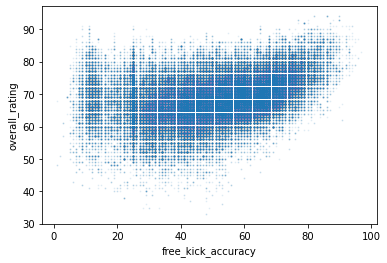

In [82]:
# scatter plot for overall_rating against free_kick_accuracy
df_player_attr.plot(x='free_kick_accuracy', y='overall_rating', kind='scatter',s=.5,alpha=0.1);

free kick accracy doesn't have strong impact on overall_rating

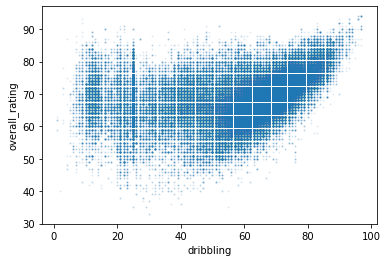

In [83]:
# scatter plot for overall_rating against dribbling
players.plot(x='dribbling', y='overall_rating', kind='scatter',s=1,alpha=0.1);

dribbling has strong postive relation with overall_rating

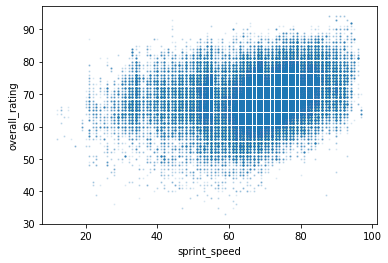

In [84]:
# scatter plot for overall_rating against sprint_speed
players.plot(x='sprint_speed', y='overall_rating', kind='scatter',s=1,alpha=0.1);

sprint_speed has postive relation with overall_rating

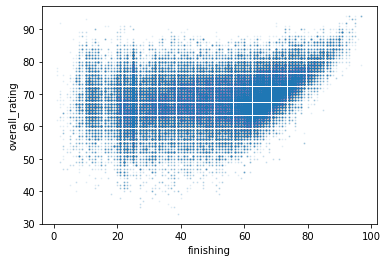

In [85]:
# scatter plot for overall_rating against finishing
players.plot(x='finishing', y='overall_rating', kind='scatter',s=.5,alpha=0.1);

finishing has strong impact on overall_rating

In [86]:
# get groubing by year and player name we get for these columnsthen   we get the mean  and sort
best=players.groupby([ 'year','player_name'])\
['overall_rating','heading_accuracy','finishing','dribbling','sprint_speed','free_kick_accuracy']\
.mean().sort_values('overall_rating',ascending=False)[:8].sort_values('year',ascending=True)

<ipython-input-86-67ce453ee187>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  best=players.groupby([ 'year','player_name'])\


In [87]:
# showing the best player table
best

overall_rating  heading_accuracy  finishing  \
year player_name                                                      
2011 Lionel Messi            92.000000              69.0  92.000000   
2012 Lionel Messi            94.000000              73.0  94.000000   
     Cristiano Ronaldo       92.000000              87.0  90.500000   
2013 Lionel Messi            94.000000              71.6  97.000000   
2014 Lionel Messi            93.333333              71.0  95.000000   
     Cristiano Ronaldo       92.000000              86.0  93.500000   
2015 Lionel Messi            93.428571              71.0  93.571429   
     Cristiano Ronaldo       92.600000              86.0  95.000000   

                        dribbling  sprint_speed  free_kick_accuracy  
year player_name                                                     
2011 Lionel Messi       96.500000     90.000000           82.000000  
2012 Lionel Messi       97.000000     92.000000           82.000000  
     Cristiano Ronaldo  92.000000     94.000000           83.000000  
2013 Lionel Messi       97.000000     89.800000           86.000000  
2014 Lionel Messi       96.333333     89.333333           88.666667  
     Cristiano Ronaldo  91.500000     94.000000           79.000000  
2015 Lionel Messi       96.000000     90.000000           90.000000  
     Cristiano Ronaldo  93.000000     93.400000           77.800000

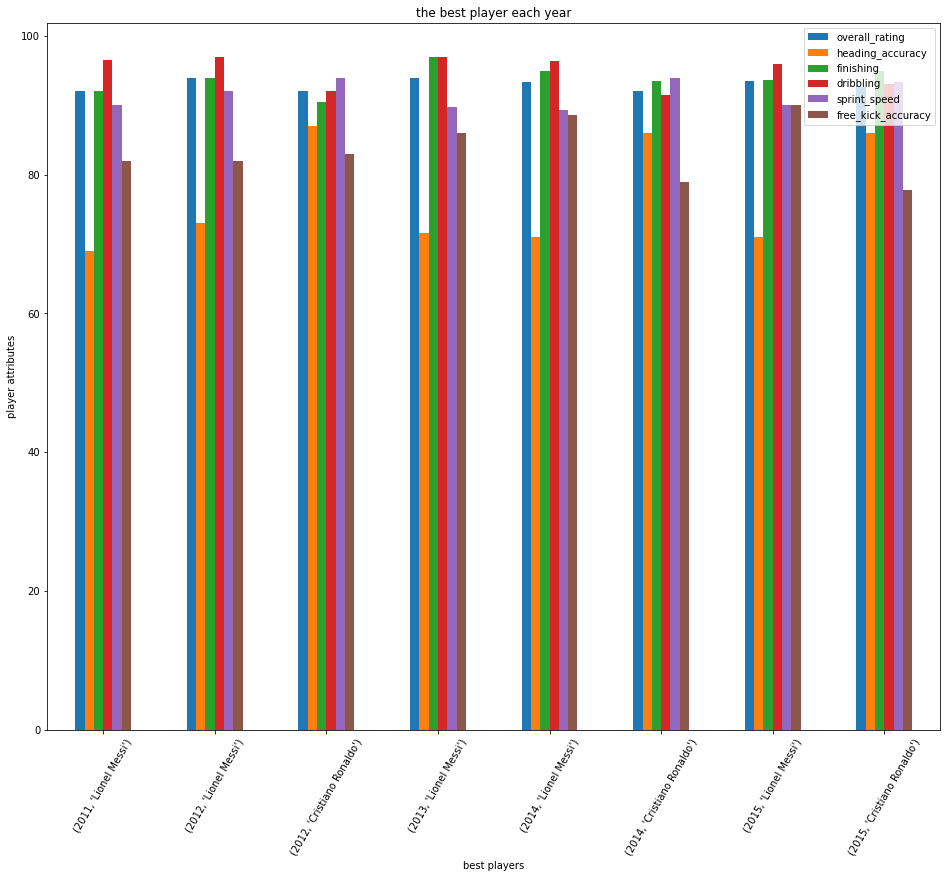

In [88]:
fig, x = plt.subplots(figsize=(16, 13))

# create a new bar char
x = best.plot.bar(ax=x);

# get the x axis by player name and year 
x.set_xticklabels(best.index, rotation=60)

# Set the  y axis label
x.set_ylabel('player attributes')

# Set the x axis label 
plt.xlabel("best players")

# Set the title
x.set_title('the best player each year')

plt.show();

from this chart we know messi has the best for many year and he was special in dribbling and finishing and cristiano ronaldo was special in sprint speed and heading accuracy

### Research Question 5  who won the league in 2012/2013 in each country?
in his question we will use match table then finding  the most victories in 2012/2013 then find the league name for each team 


In [89]:
# showing the match table to remember the columns
match.head()

,season,stage,date,match_api_id,home_team_goal,away_team_goal,country_name,league_name,home_team,away_team,winner
0,2008/2009,1,2008-08-17,492473,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
1,2009/2010,5,2009-08-30,665353,1,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,tie
2,2010/2011,1,2010-08-01,838476,2,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
3,2011/2012,1,2011-07-30,1032694,3,1,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk
4,2012/2013,11,2012-10-20,1224064,3,0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,KRC Genk


In [90]:
# get the season 2012/2013
season_match =match[match['season']=='2012/2013']
# get the most team has victories in this season
winner_teams=season_match ['winner'].value_counts().sort_values(ascending=False)
winner_teams.head()

tie                  853
FC Barcelona          32
FC Bayern Munich      29
Manchester United     28
Juventus              27
Name: winner, dtype: int64

note that tie has the most number so we will take most winners from the second number statring from FC Barcelona

In [91]:
# create empty dictionary
s={}
# looping throw the winners teams
for team_name in winner_teams.index[1:] :
    
    # get the league name for each winner team 
    z=match[match['winner']==team_name]['league_name'].head(1)
    league_name=z[z.index[0]]
    
    # make sure that winner of the league does't Exist
    if not(league_name in s.keys()):
        # storing the winners in the dictionary
        s[league_name]=team_name
        print("The Winner of the {}  is {}".format(league_name,team_name))
    

The Winner of the Spain LIGA BBVA  is FC Barcelona
The Winner of the Germany 1. Bundesliga  is FC Bayern Munich
The Winner of the England Premier League  is Manchester United
The Winner of the Italy Serie A  is Juventus
The Winner of the France Ligue 1  is Paris Saint-Germain
The Winner of the Portugal Liga ZON Sagres  is SL Benfica
The Winner of the Scotland Premier League  is Celtic
The Winner of the Netherlands Eredivisie  is Ajax
The Winner of the Switzerland Super League  is FC Basel
The Winner of the Belgium Jupiler League  is RSC Anderlecht
The Winner of the Poland Ekstraklasa  is Legia Warszawa


### Research Question 6  What team attributes lead to the most victories?
this question is relivant with the last one. we need to know the team attributes that lead to most victories

In [92]:
# get the first 10 team that has most victories 
winner=winner_teams[1:10].index
winner

Index(['FC Barcelona', 'FC Bayern Munich', 'Manchester United', 'Juventus',
       'Real Madrid CF', 'Paris Saint-Germain', 'SL Benfica', 'Celtic',
       'FC Porto'],
      dtype='object')

In [93]:
# specify the columns that we can average throw them to get attributes of the winner teams 
col = ['team_long_name','defencePressure', 'defenceAggression',\
       'defenceTeamWidth','buildUpPlaySpeed', 'buildUpPlayPassing',\
           'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting']

In [94]:
# get team attributes table
team_att = pd.read_csv('team_attributes.csv')
team_att.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year
0,1,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,60,...,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR,2010
1,2,9930,2014-09-19,52,Balanced,Normal,56,Mixed,Organised,54,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2014
2,3,9930,2015-09-10,47,Balanced,Normal,54,Mixed,Organised,54,...,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR,2015
3,4,8485,2010-02-22,70,Fast,Little,70,Long,Organised,70,...,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE,2010
4,5,8485,2011-02-22,47,Balanced,Little,52,Mixed,Organised,53,...,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE,2011


In [95]:
# get the winner attributes at season 2012/2013 with specified columns 
winners_attr = team_att.query('(year== 2012 or year == 2013) and team_long_name in @winner')[col]

In [96]:
# get the year of each winner team 
winners_year=team_att.query('(year== 2012 or year == 2013) and team_long_name in @winner')["year"]

In [97]:
winners_attr

,team_long_name,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting
120,FC Barcelona,66,63,66,24,25,37,24,54
121,FC Barcelona,61,63,65,35,32,37,31,35
144,FC Bayern Munich,49,35,50,47,40,34,31,55
145,FC Bayern Munich,52,54,52,56,41,40,44,39
162,SL Benfica,61,51,57,55,48,69,56,54
163,SL Benfica,60,58,57,65,54,69,56,54
290,Celtic,50,50,60,70,58,54,58,60
291,Celtic,55,51,60,50,53,57,58,60
434,FC Porto,61,49,60,52,53,56,72,68
435,FC Porto,58,60,57,52,53,56,72,68


In [98]:
# get the values of winners year to add them to winner name 
year_values=winners_year[winners_year.index].values.astype('str')

winners_name_new=winners_attr['team_long_name'] + " " + year_values
winners_name_new

120            FC Barcelona 2012
121            FC Barcelona 2013
144        FC Bayern Munich 2012
145        FC Bayern Munich 2013
162              SL Benfica 2012
163              SL Benfica 2013
290                  Celtic 2012
291                  Celtic 2013
434                FC Porto 2012
435                FC Porto 2013
624                Juventus 2012
625                Juventus 2013
806       Manchester United 2012
807       Manchester United 2013
960     Paris Saint-Germain 2012
961     Paris Saint-Germain 2013
1047         Real Madrid CF 2012
1048         Real Madrid CF 2013
Name: team_long_name, dtype: object

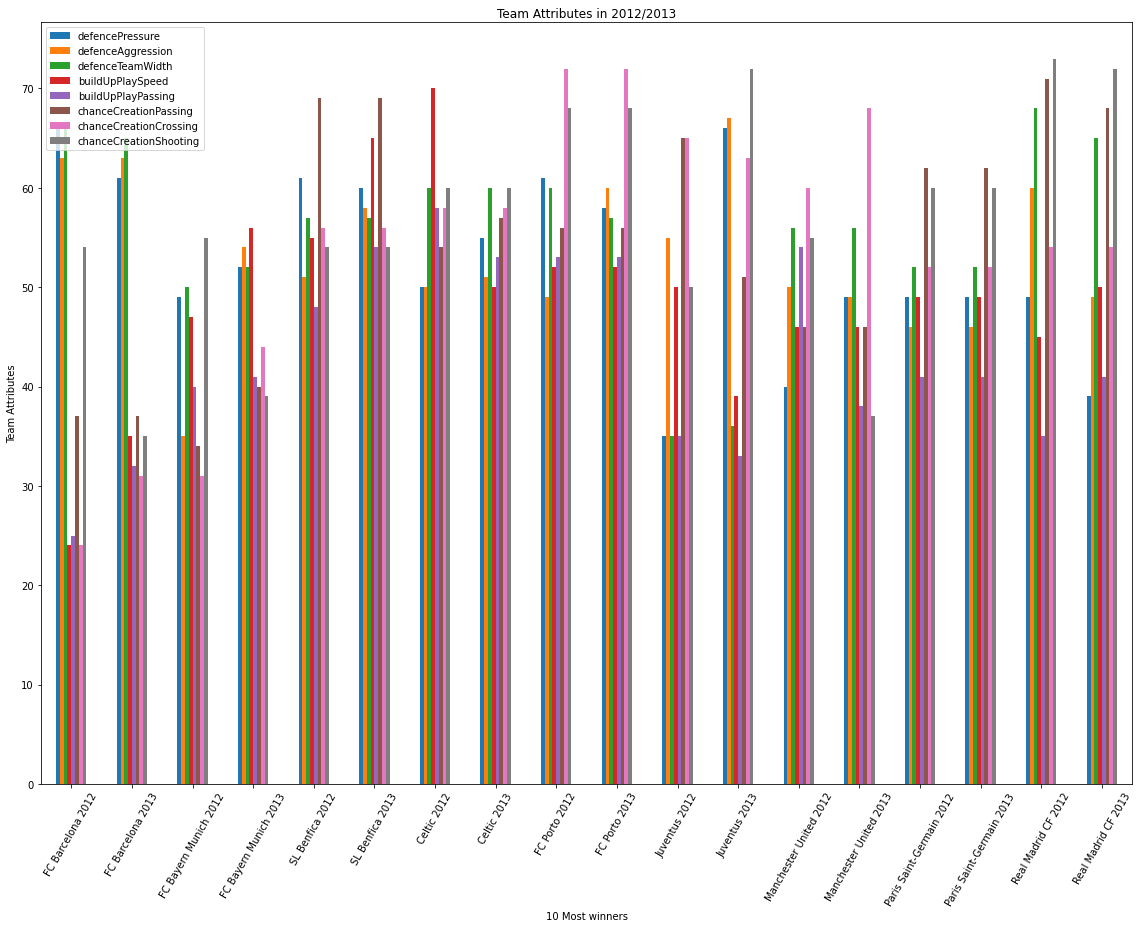

In [99]:
fig, x = plt.subplots(figsize=(16, 13))

# create a new bar char
x = winners_attr.plot.bar(ax=x);

x.set_xticklabels(winners_name_new, rotation=60)

# Set the x axis label 
plt.xlabel("10 Most winners")

# Set the y axis label
x.set_ylabel('Team Attributes')

# Set the title
x.set_title('Team Attributes in 2012/2013')



plt.tight_layout();

from the previos chart that 
- barcelona was special in defence pressure and defence team width
- bayerm munich was special in build up play speed
- benfica was special in chance creation passing 
- real madrid was special in chance creation shooting
- Manchester United special in chance creation crossing and defence team width
- Juventus special in defence aggression and chance creation shooting

## limitation 
in this section I will show my challanges throw the analysis and answering questoins.

the most important tables and most challanging was match and player attributes table,player has 212 dublicated name but its because some name are famous so its different player with the same name.

match table had many missing values so i decided to take the columns that has no missing values and work with them because the most of the columns that has missing value are not used and I am not interested with it so I dropped the columns with missing values,after I dropped the columns there only 11 column left.,match table wasnot ready for answering question because team ,country and league was number so we need to merge with there table so we can know the analysis with the name I performed three merge operation.i need to indicate the winner so I add column called winner from home_team and away_team based on the goals scored in the match and if the number of goals are equal I wrote "tie",converting the date columns into date time to deal with and creating new column called year help me to answer these questions(Which team had the most victories at away in 2011/2012 season?,who won the league in 2012/2013 in each country?,What team attributes lead to the most victories?)

player and player attribute table,I  merge the two table because player attribute has the number of the player so its easy to analysis to know the name of the player, I convert the date column into date time and add year column it helped me ih answering
(what player attributes lead to be the best each year ?)question


<a id='conclusions'></a>
## Conclusions
In this section I will come with my result of answering the questions

1. Which team had the most victories at away in 2011/2012 season?

>real madrid has the most victories in 2011/2012  by 16 wins

2. Which players had the most penalties?
>the players has the most penalties is Alessio Cerci and Mario Balotelli

>but the player has  biggest average penalties Paolo Maldini and Dario Smoje

3. who the best player in free kick accuracy?
>Andrea Pirlo and David Beckham are the best player in free kick

4. what player attributes lead to be the best each year ?
>In this question i group the player table by year and player name then apply mean on some columns that specify the most attributes of the player  then sort the values  and the bar char illustrates that.
I found that messi is most winner of the best player.

5. who won the league in 2012/2013 in each country?
>- The Winner of the Spain LIGA BBVA  is FC Barcelona
>- The Winner of the Germany 1. Bundesliga  is FC Bayern Munich
>- The Winner of the England Premier League  is Manchester United
>- The Winner of the Italy Serie A  is Juventus
>- The Winner of the France Ligue 1  is Paris Saint-Germain
>- The Winner of the Portugal Liga ZON Sagres  is FC Porto
>- The Winner of the Scotland Premier League  is Celtic
>- The Winner of the Netherlands Eredivisie  is Ajax
>- The Winner of the Switzerland Super League  is FC Basel
>- The Winner of the Poland Ekstraklasa  is Legia Warszawa
>- The Winner of the Belgium Jupiler League  is RSC Anderlecht


6. What team attributes lead to the most victories?

>In this question I specify season 2012/2013 and find the most winner matches in this season.

>these team are ('FC Barcelona', 'FC Bayern Munich', 'Manchester United', 'Juventus','Real Madrid CF', 'Paris Saint-Germain', 'FC Porto', 'SL Benfica','Celtic')

>Then I plot bar chart that demostrates the attributes of the winner teams.
attributes like ('team_long_name','defencePressure', 'defenceAggression','defenceTeamWidth','buildUpPlaySpeed', 'buildUpPlayPassing','chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting'  )     




